In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Adding Train and Test

In [53]:
train_data=pd.read_csv('Train (1).csv')   # Reading Train and test file
test_data=pd.read_csv('Test (1).csv')
train_data.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65
5,5,Skoda Fabia 1.6 MPI Elegance,Pune,2012,41629,Petrol,Manual,Second,14.83 kmpl,1598 CC,105 bhp,5.0,2.25
6,6,Honda Brio S MT,Mumbai,2013,17003,Petrol,Manual,First,19.4 kmpl,1198 CC,86.8 bhp,5.0,3.15
7,7,BMW X1 sDrive20d,Mumbai,2013,43000,Diesel,Automatic,First,17.05 kmpl,1995 CC,184 bhp,5.0,17.50
8,8,Honda City 1.5 V MT,Kolkata,2010,45008,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,3.00
9,9,Mercedes-Benz GLE 350d,Coimbatore,2018,29277,Diesel,Automatic,First,11.57 kmpl,2987 CC,254.79 bhp,5.0,59.65


In [54]:
train_data =train_data.drop(['Name', 'Unnamed: 0'], axis=1)    # Removing the Name Column considering it as irrelevant
test_data=test_data.drop(['Name','Unnamed: 0'],axis=1)

:I converted the Mileage column in both train_data and test_data from a string format containing units (' kmpl' or ' km/kg') to a numeric format (float) by removing the units using str.replace() and applying astype(float). :Similarly, I cleaned the Engine column by removing the ' CC' suffix and converting it to a float. :For the Power column, I removed the ' bhp' suffix, replaced 'null' values with np.nan, and converted the column to a numeric format. For Mileage, Engine, Power, and Seats columns in both train_data and test_data, I filled missing values (NaN) with their respective median values to ensure continuity and reduce the impact of outliers

In [55]:
train_data['Mileage'] =train_data['Mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
train_data['Engine'] =train_data['Engine'].astype(str).str.replace(" CC", "").astype(float)
train_data['Power'] =train_data['Power'].astype(str).str.replace(" bhp", "").replace('null', np.nan).astype(float)
train_data['Mileage'] =train_data['Mileage'].fillna(train_data['Mileage'].median())
train_data['Engine'] =train_data['Engine'].fillna(train_data['Engine'].median())
train_data['Power'] =train_data['Power'].fillna(train_data['Power'].median())
train_data['Seats'] =train_data['Seats'].fillna(train_data['Seats'].median())
test_data['Mileage'] =test_data['Mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
test_data['Engine'] =test_data['Engine'].astype(str).str.replace(" CC", "").astype(float)
test_data['Power'] =test_data['Power'].astype(str).str.replace(" bhp", "").replace('null', np.nan).astype(float)
test_data['Mileage'] =test_data['Mileage'].fillna(test_data['Mileage'].median())
test_data['Engine'] =test_data['Engine'].fillna(test_data['Engine'].median())
test_data['Power'] =test_data['Power'].fillna(test_data['Power'].median())
test_data['Seats'] =test_data['Seats'].fillna(test_data['Seats'].median())


The variables which only have inputs can be one hot encoded where new columns are created containing True and False

In [56]:
train_data_new = pd.get_dummies(train_data[['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']], drop_first=True)
train_ft = pd.concat([train_data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']],train_data_new], axis=1)
train_price =train_data['Price']
test_data_new = pd.get_dummies(test_data[['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']], drop_first=True)
test_ft = pd.concat([test_data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']],test_data_new], axis=1)
test_price =test_data['Price']

In [57]:
train_ft

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2017,16500,23.84,1199.0,84.00,5.0,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2017,47357,18.49,1493.0,100.00,7.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2014,35000,15.00,1598.0,103.52,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
3,2007,200000,17.20,1396.0,53.50,5.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,2013,64000,21.02,1248.0,88.76,5.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2009,150000,11.00,2993.0,235.00,5.0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3746,2012,85000,11.79,2179.0,120.00,7.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3747,2007,55100,18.90,998.0,67.10,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3748,2014,77500,20.45,1461.0,83.80,5.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [58]:
train_ft = (train_ft - train_ft.mean()) / train_ft.std()
test_ft = (test_ft - test_ft.mean()) / test_ft.std()
x_train = train_ft.values
y_train = train_price.values.reshape(-1, 1)
x_test = test_ft.values
y_test = test_price.values.reshape(-1, 1)

In [59]:
def predict(x,w,b):
    pred=np.dot(x,w)+b
    return pred

In [60]:
w = np.random.randn(x_train.shape[1], 1)
bias=0.0
iterations = 500
alpha = 0.01 # learning rate
loss_history = []
m = len(y_train)
for i in range(iterations):
    p = np.dot(x_train, w) + bias
    e = p - y_train
    msel = np.mean(e ** 2)
    loss_history.append(msel)

    we = (2/m) * np.dot(x_train.T, e)
    b = (2/m) * np.sum(e)

    w -= alpha * we
    bias -= alpha * b

yt = np.dot(x_train, w) + bias


In [61]:
print("Loss vs Iterations")
for i in range(len(loss_history)):
  if i%100==0:
    print(f'Loss: {loss_history[i]}         Iteration: {i}')

Loss vs Iterations
Loss: 240.41700120362924         Iteration: 0
Loss: 42.15252023131658         Iteration: 100
Loss: 38.93963313948708         Iteration: 200
Loss: 38.47683036411915         Iteration: 300
Loss: 38.265257831719644         Iteration: 400


In [62]:
ssresidual=np.sum((y_train-yt)**2)
sstotal=np.sum((y_train-np.mean(y_train))**2)
r2=1-(ssresidual/sstotal)
print(r2)

0.6963469358670236


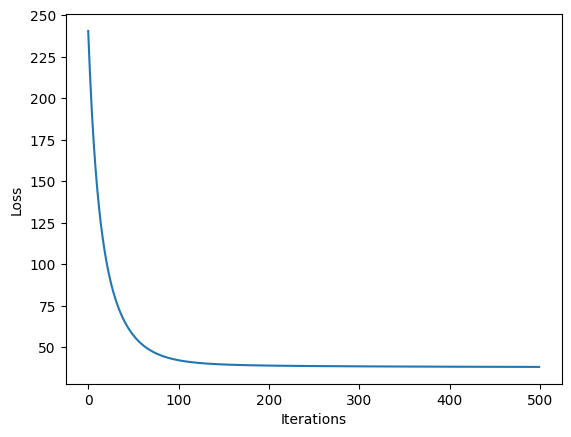

In [63]:
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Predivted vs Actual Price


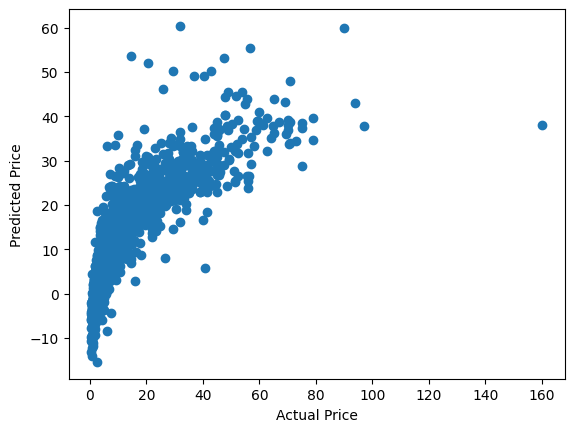

In [42]:
print("Predivted vs Actual Price")
plt.scatter(y_train, yt)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()